In [323]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [324]:
binfile = '/mnt/store1/oliverphilcox/PowerSpectra/k_binning2.csv'
counts_dir = '/mnt/store1/oliverphilcox/PowerQPM/'
n = 19
m = 3

#### Load Counts

In [325]:
k_bins = np.loadtxt(binfile).mean(axis=1)
all_k = np.loadtxt(binfile)

In [326]:
RR = np.zeros([n,m])
index = 0
while True:
    filename = counts_dir+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
    if not os.path.exists(filename):
        break
    RR+=np.loadtxt(filename)
    index+=1

In [327]:
all_DD=[]
all_DR=[]
good_mocks=[]
n_mocks=0
for mock_int in range(1,31):
    mock_no = str(mock_int).zfill(4)
    if os.path.exists(counts_dir+'DD_mock_%s_power_counts_n%d_m%d_full.txt'%(mock_no,n,m)):
        if os.path.exists(counts_dir+'DR_mock_%s_power_counts_n%d_m%d_full.txt'%(mock_no,n,m)):
            DD = np.loadtxt(counts_dir+'DD_mock_%s_power_counts_n%d_m%d_full.txt'%(mock_no,n,m))
            DR = np.loadtxt(counts_dir+'DR_mock_%s_power_counts_n%d_m%d_full.txt'%(mock_no,n,m))
            all_DD.append(DD)
            all_DR.append(DR)
            n_mocks+=1
            good_mocks.append(mock_no)

#### Compute number of pairs

In [329]:
### count number of random particles
rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x.xyzwj'
with open(rand_par) as infile:
    for l,line in enumerate(infile):
        pass
N_rand = l+1

In [330]:
### count number of galaxies in each file
N_gal_all=[]
for mock_no in good_mocks:
    ### count number of galaxies
    gal_par = '/mnt/store1/oliverphilcox/QPM_proc/qpm_galaxy_%s.xyzw'%mock_no
    with open(gal_par) as infile:
        for l,line in enumerate(infile):
            pass
    N_gal_all.append(l+1)

In [331]:
### count number of randoms
index = 0.
RR_pairs = 0.
while True:
    this_rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x_%d'%index
    if not os.path.exists(this_rand_par):
        break
    with open(this_rand_par) as infile:
        for l,line in enumerate(infile):
            pass
    RR_pairs+=(l+1)*l
    index+=1

#### Compute normalization

In [332]:
rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x.xyzwj'
norm = 0.
with open(rand_par) as infile:
    for l,line in enumerate(infile):
        this_w = float(line.split()[3])
        norm+=this_w**2.*(1./this_w-1.)/20000

### Compute power estimates

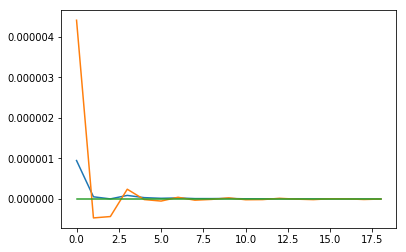

In [333]:
plt.plot(all_DD[-1][:,0]/DD_pairs)
plt.plot(all_DR[-1][:,0]/DR_pairs)#/DR)
plt.plot(RR[:,0]/RR_pairs)

In [334]:
all_power = []
for i in range(len(good_mocks)):
    this_norm = norm*N_gal_all[i]/N_rand
    DR_pairs = N_rand*N_gal_all[i]
    DD_pairs = N_gal_all[i]*(N_gal_all[i]-1)
    all_power.append((all_DD[i]-2.*all_DR[i]/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm)    

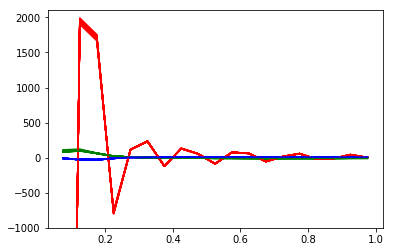

In [340]:
for i in range(len(good_mocks)):
    plt.plot(k_bins,all_power[i][:,0],ls='-',c='r')
    plt.plot(k_bins,all_power[i][:,1],ls='-',c='g')
    plt.plot(k_bins,all_power[i][:,2],ls='-',c='b')
    plt.ylim([-1000,2100])

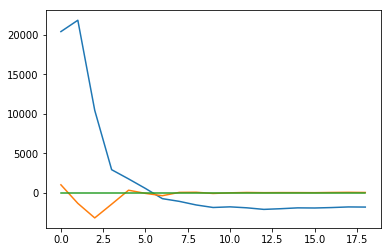

In [344]:
plt.plot(all_DD[0][:,1])
plt.plot(2.*all_DR[0][:,1]/(DR_pairs/DD_pairs))
plt.plot(RR[:,1]/(RR_pairs/DD_pairs))

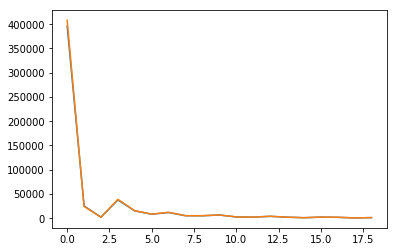

In [346]:
plt.plot(all_DD[0][:,0])
plt.plot(DD[:,0])

In [361]:
DR = np.loadtxt('/mnt/store1/oliverphilcox/PowerQPM50/DR_power_counts_n19_m3_full.txt')
DR2 = np.loadtxt('/mnt/store1/oliverphilcox/PowerQPM/DR_mock_0001_power_counts_n19_m3_full.txt')

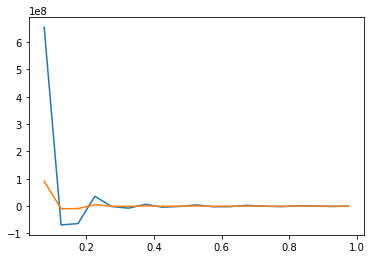

In [366]:
plt.plot(k_bins,DR[:,0])
plt.plot(k_bins,DR2[:,0])

In [347]:
DD=np.loadtxt('/mnt/store1/oliverphilcox/PowerTest/DD_power_counts_n18_m3_full.txt')
k = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/k_binning.csv').mean(axis=1)
DD2=np.loadtxt('/mnt/store1/oliverphilcox/PowerTest2/DD_power_counts_n18_m3_full.txt')
k2 = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/k_binning.csv').mean(axis=1)

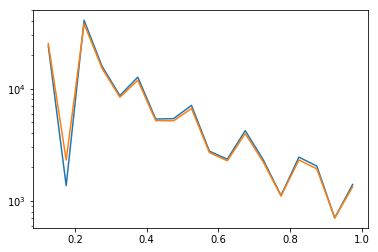

In [353]:
plt.plot(k,DD[:,0])
plt.plot(k2,DD2[:,0])
plt.yscale('log');

In [349]:
n=19
kk3 = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/k_binning2.csv').mean(axis=1)
counts_dir3 = '/mnt/store1/oliverphilcox/PowerQPM50/'
DD3 = np.loadtxt(counts_dir3+'DD_power_counts_n%d_m%d_full.txt'%(n,m))
DR3 = np.loadtxt(counts_dir3+'DR_power_counts_n%d_m%d_full.txt'%(n,m))
RR3 = np.zeros_like(DR3)
index = 0
while True:
    filename = counts_dir3+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
    if not os.path.exists(filename):
        break
    RR3+=np.loadtxt(filename)
    index+=1
n=18

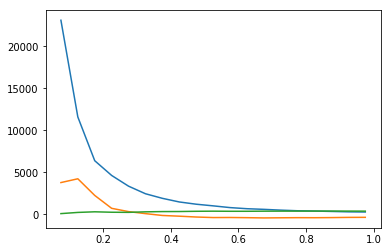

In [350]:
pow3=(DD3-2.*DR3/(DR_pairs/DD_pairs)+RR3/(RR_pairs/DD_pairs))/norm
for i in range(3):
    plt.plot(kk3,pow3[:,i])

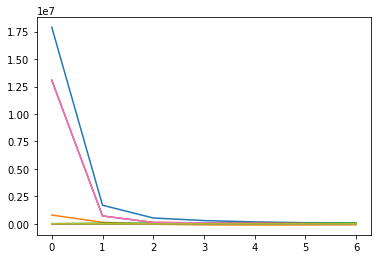

In [302]:
plt.plot(DD3[::3])
plt.plot(DR3[::3]/50)
plt.plot(RR3[::3]/50)

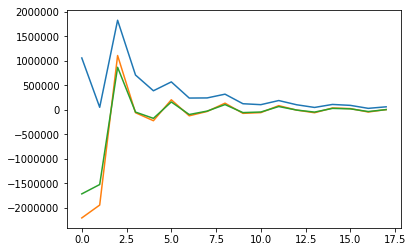

In [303]:
plt.plot(all_DD[0][:,0])
plt.plot(all_DR[0][:,0]/5)
plt.plot(RR[:,0]/1)

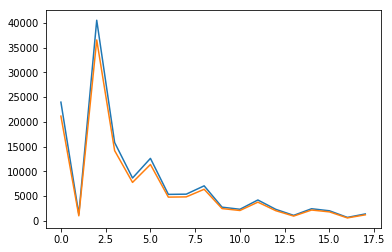

In [270]:
plt.plot(DD3[::3])
plt.plot(all_DD[0][:,0]/50)

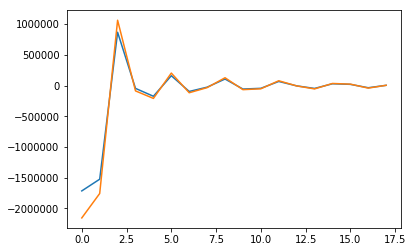

In [272]:
plt.plot(RR[:,0])
plt.plot(RR3[::3])

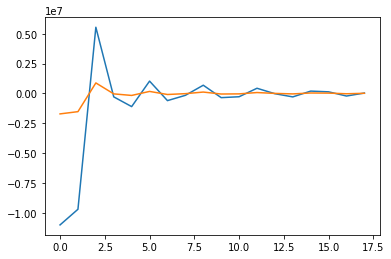

In [280]:
plt.plot(all_DR[0][:,0])
plt.plot(DR3[::3])

In [35]:
all_power = []
pow_mean,pow_std = [np.zeros([n,m]) for _ in range(2)]
for i in range(n_mocks):
    all_power.append((all_DD[i]-2.*all_DR[i]/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm)
for i in range(n):
    for j in range(m):
        pow_mean[i,j] = np.mean([all_power[ind][i,j] for ind in range(n_mocks)])
        pow_std[i,j] = np.std([all_power[ind][i,j] for ind in range(n_mocks)])

In [58]:
stacked_mat = np.vstack([power.ravel() for power in all_power]).T

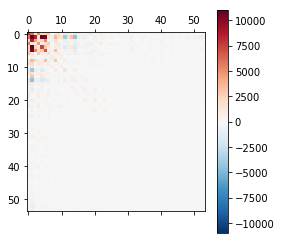

In [61]:
mat=np.cov(stacked_mat)
vmax=np.percentile(mat,99.9)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cm.RdBu_r)
plt.colorbar();

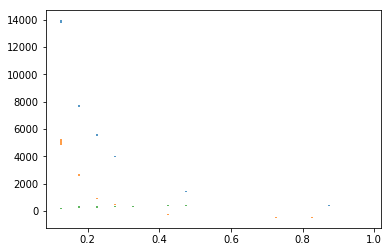

In [39]:
for i in range(m):
    plt.errorbar(k_bins,pow_mean[:,i],pow_std[:,i],ls='')

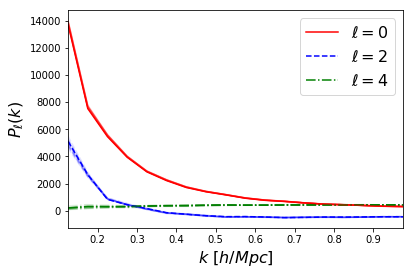

In [105]:
for i in range(n_mocks):
    if i==0:
        plt.plot(k_bins,all_power[i][:,0],label=r'$\ell=0$',c='r',ls='-')
        plt.plot(k_bins,all_power[i][:,1],label=r'$\ell=2$',c='b',ls='--')
        plt.plot(k_bins,all_power[i][:,2],label=r'$\ell=4$',c='g',ls='-.')
    else:
        plt.plot(k_bins,all_power[i][:,0],c='r',ls='-',alpha=0.1)
        plt.plot(k_bins,all_power[i][:,1],c='b',ls='--',alpha=0.1)
        plt.plot(k_bins,all_power[i][:,2],c='g',ls='-.',alpha=0.1)
plt.legend(fontsize=16);
plt.ylabel(r'$P_\ell(k)$',fontsize=16);plt.xlabel(r'$k\,\,[h/Mpc]$',fontsize=16)
plt.xlim([0.125,0.975]);

In [93]:
all_power[0][0]

array([13715.95492505,  5109.8731135 ,   206.8363445 ])

In [26]:
power_estimate = (DD-2.*DR/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm

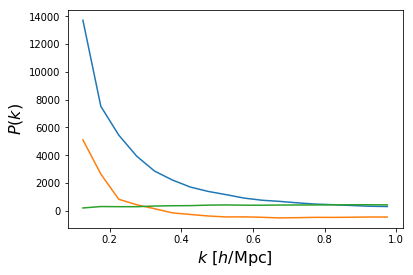

In [285]:
#plt.plot(k_bins,power_estimate)
plt.plot(k_bins,binned_power_estimate.reshape(-1,3))
#plt.yscale('log')
plt.ylabel(r'$P(k)$',fontsize=16);plt.xlabel(r'$k\,\,[h/$Mpc]',fontsize=16);

**Add simple CAMB model for comparison**

In [62]:
power_model=np.load('/mnt/store1/oliverphilcox/PowerSpectra/linear_kaiser_power.npz')
kh = power_model['k']
pk = power_model['pow'][0]

## First fit power spectrum to spline
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(np.log(kh),np.log(pk[:]),s=1)
def linear_power_model(k):
    return np.exp(spl(np.log(k)))

def kaiser_power_model(k,ell):
    """ Kaiser linear power model from https://wwwmpa.mpa-garching.mpg.de/~komatsu/lecturenotes/Shun_Saito_on_RSD.pdf"""
    f = 0.774 # jaiser power
    b = 2 # bias
    lin_pow = linear_power_model(k)
    beta = f/b
    if ell==0:
        return (1.+2./3.*beta+1./5.*beta**2.)*b**2.*lin_pow
    elif ell==2:
        return (4./3.*beta+4./7.*beta**2.)*b**2.*lin_pow
    elif ell==4:
        return 8./45.*beta**2.*b**2.*lin_pow
    else:
        raise Exception("Only ell = 0,2,4 in linear model")

In [63]:
from scipy.integrate import quad

ell=0

#binned_power = []
true_binned_power = []
true_point_power = []

for i in range(len(all_k)):
    #binned_power.append(quad(lambda k: kaiser_power_model(k,2)*k,all_k[i,0],all_k[i,1])[0]/quad(lambda k: k,k_bins[i,0],k_bins[i,1])[0])
    true_binned_power.append(quad(lambda k: kaiser_power_model(k,0)*k**2.,all_k[i,0],all_k[i,1])[0]/quad(lambda k: k**2.,all_k[i,0],all_k[i,1])[0])
    true_point_power.append(kaiser_power_model(np.mean([all_k[i,0],all_k[i,1]]),0))

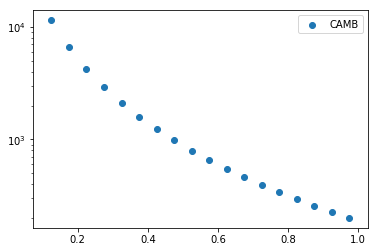

In [72]:
kk = np.mean(all_k,axis=1)
plt.scatter(kk,power_estimate,label='RascalC')
plt.scatter(kk,true_point_power,label='CAMB');
plt.legend();plt.yscale('log');

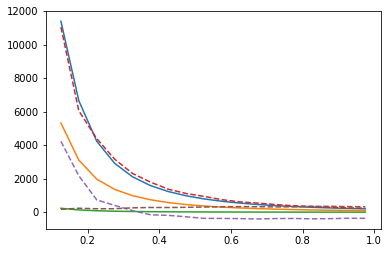

In [78]:
for ell in [0,2,4]:
    plt.plot(kk,[kaiser_power_model(k,ell) for k in kk])
plt.plot(kk,power_estimate.reshape(-1,3)*0.8,ls='--')

#### Compare binned vs unbinned

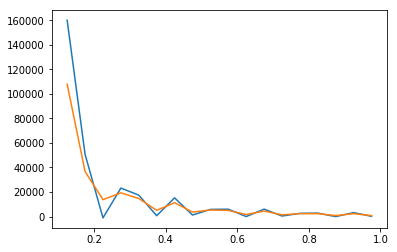

In [105]:
plt.plot(k_bins,DD)
plt.plot(k_bins,DD_binned)

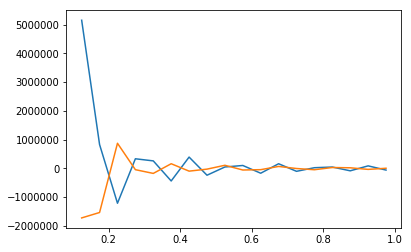

In [107]:
plt.plot(k_bins,DR)
plt.plot(k_bins,DR_binned)